### We will use [this](https://dr15.sdss.org/marvin/galaxy/8341-12704/) MaNGA galaxy to see if it makes a difference in binning order when we calculate SFR in different galaxies.

#### This is a nice, blue galaxy with well defined spiral arms. Let's first just measure SFR using the regular method, where we calculate each spaxel's SFR and then average them for the bins of our choosing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from new_Galaxy import SpiralGalaxy

INFO: No release version set. Setting default to MPL-7


In [2]:
plt.style.use('seaborn-colorblind')

In [3]:
gz3d_path = '/raid5/homes/sshamsi/sas/mangawork/manga/sandbox/galaxyzoo3d/v1_0_0/1-620993_127_5679450.fits.gz'

In [4]:
gal = SpiralGalaxy(gz3d_path)

In [5]:
gal.form_global_df()

/raid5/homes/sshamsi/galaxy_zoo/GZ3D-spiral_analysis/new_Galaxy.py:134: RuntimeWarning: invalid value encountered in double_scalars
  x['SFR'] = (self.delta * (ha_flux**3.36) * (hb_flux**-2.36)) / self.spax_area


This galaxy should have a good overall S/N, but let us check the $H_{\alpha}$ and $H_{\beta}$ S/N for each spaxel as well.

In [6]:
map_ha = gal.maps.getMap('emline_gflux', channel='ha_6564')
map_hb = gal.maps.getMap('emline_gflux', channel='hb_4862')
    
ha_snr = map_ha.snr.flatten()
hb_snr = map_hb.snr.flatten()
    
gal.df['S/N $H_{\\alpha}$'] = ha_snr
gal.df['S/N $H_{\\beta}$'] = hb_snr

In [7]:
df = gal.df
df = df.dropna()

df

,Radius,$H_{\alpha}$,$\sigma H_{\alpha}$,$H_{\beta}$,$\sigma H_{\beta}$,Spiral Arm,Comp,AGN,Seyfert,Liner,SFR,$\sigma$SFR,$r/r_e$,S/N $H_{\alpha}$,S/N $H_{\beta}$
712,33.768894,0.535118,0.023167,0.173147,0.022777,0.0,0.0,0.0,0.0,0.0,0.001093,0.000375,2.003737,23.097990,7.602022
717,32.896325,0.408069,0.023853,0.168404,0.020757,0.0,0.0,0.0,0.0,0.0,0.000469,0.000165,1.951961,17.107914,8.112955
784,33.915712,0.674446,0.025915,0.228612,0.027325,0.0,0.0,0.0,0.0,0.0,0.001234,0.000383,2.012448,26.025515,8.366449
785,33.563176,0.642408,0.027170,0.234534,0.030717,0.0,0.0,0.0,0.0,0.0,0.000986,0.000336,1.991530,23.643688,7.635216
786,33.237171,0.659071,0.027052,0.241470,0.029721,0.0,0.0,0.0,0.0,0.0,0.001004,0.000323,1.972186,24.363129,8.124537
787,32.938485,0.689043,0.026092,0.237293,0.028050,0.0,0.0,0.0,0.0,0.0,0.001214,0.000372,1.954463,26.408419,8.459572
788,32.667866,0.644123,0.026615,0.204016,0.026430,0.0,0.0,0.0,0.0,0.0,0.001383,0.000464,1.938405,24.201838,7.718992
790,32.213590,0.411307,0.025738,0.109867,0.026572,0.0,0.0,0.0,0.0,0.0,0.001320,0.000803,1.911450,15.980528,4.134635
791,32.031165,0.370965,0.026519,0.095124,0.025775,0.0,0.0,0.0,0.0,0.0,0.001311,0.000896,1.900625,13.988819,3.690582
793,31.758311,0.436881,0.024003,0.169857,0.022564,0.0,0.0,0.0,0.0,0.0,0.000578,0.000210,1.884435,18.201237,7.527962


We can filter by ensureing that $H_{\alpha}, H_{\beta}$ S/N $<3$. Doing so we lose 48 of our 2845 usable spaxels, or a $1.7\%$ loss. We'll call that an acceptable number of spaxels to lose.

In [8]:
df = df[(df['S/N $H_{\\alpha}$'] > 3) & (df['S/N $H_{\\beta}$'] > 3)]

df

,Radius,$H_{\alpha}$,$\sigma H_{\alpha}$,$H_{\beta}$,$\sigma H_{\beta}$,Spiral Arm,Comp,AGN,Seyfert,Liner,SFR,$\sigma$SFR,$r/r_e$,S/N $H_{\alpha}$,S/N $H_{\beta}$
712,33.768894,0.535118,0.023167,0.173147,0.022777,0.0,0.0,0.0,0.0,0.0,0.001093,0.000375,2.003737,23.097990,7.602022
717,32.896325,0.408069,0.023853,0.168404,0.020757,0.0,0.0,0.0,0.0,0.0,0.000469,0.000165,1.951961,17.107914,8.112955
784,33.915712,0.674446,0.025915,0.228612,0.027325,0.0,0.0,0.0,0.0,0.0,0.001234,0.000383,2.012448,26.025515,8.366449
785,33.563176,0.642408,0.027170,0.234534,0.030717,0.0,0.0,0.0,0.0,0.0,0.000986,0.000336,1.991530,23.643688,7.635216
786,33.237171,0.659071,0.027052,0.241470,0.029721,0.0,0.0,0.0,0.0,0.0,0.001004,0.000323,1.972186,24.363129,8.124537
787,32.938485,0.689043,0.026092,0.237293,0.028050,0.0,0.0,0.0,0.0,0.0,0.001214,0.000372,1.954463,26.408419,8.459572
788,32.667866,0.644123,0.026615,0.204016,0.026430,0.0,0.0,0.0,0.0,0.0,0.001383,0.000464,1.938405,24.201838,7.718992
790,32.213590,0.411307,0.025738,0.109867,0.026572,0.0,0.0,0.0,0.0,0.0,0.001320,0.000803,1.911450,15.980528,4.134635
791,32.031165,0.370965,0.026519,0.095124,0.025775,0.0,0.0,0.0,0.0,0.0,0.001311,0.000896,1.900625,13.988819,3.690582
793,31.758311,0.436881,0.024003,0.169857,0.022564,0.0,0.0,0.0,0.0,0.0,0.000578,0.000210,1.884435,18.201237,7.527962


We can now calculate the total and average SFR for the entire galaxy, the spiral arms, and the non-spiral regions

In [9]:
df_calc = df[(df['$r/r_e$'] <= 1) & (df['$r/r_e$'] >= 0.1)]
df_calc = df_calc[(df_calc.Comp == 0) & (df_calc.AGN == 0) & (df_calc.Seyfert == 0) & (df_calc.Liner == 0)]

In [10]:
tot_sfr_sum = df_calc['SFR'].sum()
sig_tot_sfr_sum = np.sqrt(gal.get_var(df_calc.index, mode='sfr', avg=False))

tot_sfr_avg = df_calc['SFR'].sum() / len(df_calc.index)
sig_tot_sfr_avg = np.sqrt(gal.get_var(df_calc.index, mode='sfr', avg=True))

In [11]:
df_calc_spiral = df_calc[df_calc['Spiral Arm'] == 1]
df_calc_nonspiral = df_calc[df_calc['Spiral Arm'] == 0]

In [12]:
spiral_sfr_sum = df_calc_spiral['SFR'].sum()
sig_spiral_sfr_sum = np.sqrt(gal.get_var(df_calc_spiral.index, mode='sfr', avg=False))

spiral_sfr_avg = df_calc_spiral['SFR'].sum() / len(df_calc_spiral.index)
sig_spiral_sfr_avg = np.sqrt(gal.get_var(df_calc_spiral.index, mode='sfr', avg=True))


nonspiral_sfr_sum = df_calc_nonspiral['SFR'].sum()
sig_nonspiral_sfr_sum = np.sqrt(gal.get_var(df_calc_nonspiral.index, mode='sfr', avg=False))

nonspiral_sfr_avg = df_calc_nonspiral['SFR'].sum() / len(df_calc_nonspiral.index)
sig_nonspiral_sfr_avg = np.sqrt(gal.get_var(df_calc_nonspiral.index, mode='sfr', avg=True))

#### Now let us construct the same measurements by binning the $H_{\alpha}$ and $H_{\beta}$ values first.

In [13]:
r = gal.hamap.size
corr_matrix = gal.corr_matrix

In [14]:
hb_cov_mat = np.zeros((r, r))

for item, frame in gal.df['$\sigma H_{\\beta}$'].iteritems():
    if pd.isnull(frame):
        k = 0
    else:
        k = frame
        
    hb_cov_mat[item] = corr_matrix[item] * k
    hb_cov_mat[:, item] = corr_matrix[:, item] * k

In [15]:
def get_hb_var(index, avg=False):
    index = set(index)
    tot_index = list(gal.df.index)
    
    w_vec = np.array([[x in index for x in tot_index]]) * 1
    cov_mat = hb_cov_mat
    
    var = np.linalg.multi_dot([w_vec, cov_mat, w_vec.T])[0][0]
    
    if avg:
        n = len(index)
        return var / (n**2)
    
    return var

In [16]:
def flux2sfr(ha_flux, ha_stdv, hb_flux, hb_stdv):
    ha_flux = ha_flux * 1E-13
    hb_flux = hb_flux * 1E-13
    
    ha_stdv = ha_stdv * 1E-13
    hb_stdv = hb_stdv * 1E-13
    
    sfr = (gal.delta * (ha_flux**3.36) * (hb_flux**-2.36)) / gal.spax_area
    sig_sfr = np.sqrt((3.36 * gal.delta * (ha_flux**2.36) * (hb_flux**-2.36) * ha_stdv)**2 +
                      (-2.36 * gal.delta * (ha_flux**3.36) * (hb_flux**-3.36) * hb_stdv)**2) / gal.spax_area
    
    return sfr, sig_sfr

We'll now form the total $H_{\alpha}$ and $H_{\beta}$ values.

In [17]:
tot_ha_sum_2 = df_calc['$H_{\\alpha}$'].sum()
sig_tot_ha_sum_2 = np.sqrt(gal.get_var(df_calc.index, mode='ha', avg=False))

tot_ha_avg_2 = df_calc['$H_{\\alpha}$'].mean()
sig_tot_ha_avg_2 = np.sqrt(gal.get_var(df_calc.index, mode='ha', avg=True))

In [18]:
tot_hb_sum_2 = df_calc['$H_{\\beta}$'].sum()
sig_tot_hb_sum_2 = np.sqrt(get_hb_var(df_calc.index, avg=False))

tot_hb_avg_2 = df_calc['$H_{\\beta}$'].mean()
sig_tot_hb_avg_2 = np.sqrt(get_hb_var(df_calc.index, avg=True))

In [19]:
spiral_ha_sum_2 = df_calc_spiral['$H_{\\alpha}$'].sum()
sig_spiral_ha_sum_2 = np.sqrt(gal.get_var(df_calc_spiral.index, mode='ha', avg=False))

spiral_ha_avg_2 = df_calc_spiral['$H_{\\alpha}$'].sum() / len(df_calc_spiral.index)
sig_spiral_ha_avg_2 = np.sqrt(gal.get_var(df_calc_spiral.index, mode='ha', avg=True))


nonspiral_ha_sum_2 = df_calc_nonspiral['$H_{\\alpha}$'].sum()
sig_nonspiral_ha_sum_2 = np.sqrt(gal.get_var(df_calc_nonspiral.index, mode='ha', avg=False))

nonspiral_ha_avg_2 = df_calc_nonspiral['$H_{\\alpha}$'].sum() / len(df_calc_nonspiral.index)
sig_nonspiral_ha_avg_2 = np.sqrt(gal.get_var(df_calc_nonspiral.index, mode='ha', avg=True))

In [20]:
spiral_hb_sum_2 = df_calc_spiral['$H_{\\beta}$'].sum()
sig_spiral_hb_sum_2 = np.sqrt(get_hb_var(df_calc_spiral.index, avg=False))

spiral_hb_avg_2 = df_calc_spiral['$H_{\\beta}$'].sum() / len(df_calc_spiral.index)
sig_spiral_hb_avg_2 = np.sqrt(get_hb_var(df_calc_spiral.index, avg=True))


nonspiral_hb_sum_2 = df_calc_nonspiral['$H_{\\beta}$'].sum()
sig_nonspiral_hb_sum_2 = np.sqrt(get_hb_var(df_calc_nonspiral.index, avg=False))

nonspiral_hb_avg_2 = df_calc_nonspiral['$H_{\\beta}$'].sum() / len(df_calc_nonspiral.index)
sig_nonspiral_hb_avg_2 = np.sqrt(get_hb_var(df_calc_nonspiral.index, avg=True))

Now for calculating the SFR

In [21]:
tot_sfr_sum_2, sig_tot_sfr_sum_2 = flux2sfr(tot_ha_sum_2, sig_tot_ha_sum_2, tot_hb_sum_2, sig_tot_hb_sum_2)
tot_sfr_avg_2, sig_tot_sfr_avg_2 = flux2sfr(tot_ha_avg_2, sig_tot_ha_avg_2, tot_hb_avg_2, sig_tot_hb_avg_2)

spiral_sfr_sum_2, sig_spiral_sfr_sum_2 = flux2sfr(spiral_ha_sum_2, sig_spiral_ha_sum_2, spiral_hb_sum_2, sig_spiral_hb_sum_2)
spiral_sfr_avg_2, sig_spiral_sfr_avg_2 = flux2sfr(spiral_ha_avg_2, sig_spiral_ha_avg_2, spiral_hb_avg_2, sig_spiral_hb_avg_2)

nonspiral_sfr_sum_2, sig_nonspiral_sfr_sum_2 = flux2sfr(nonspiral_ha_sum_2, sig_nonspiral_ha_sum_2, nonspiral_hb_sum_2, sig_nonspiral_hb_sum_2)
nonspiral_sfr_avg_2, sig_nonspiral_sfr_avg_2 = flux2sfr(nonspiral_ha_avg_2, sig_nonspiral_ha_avg_2, nonspiral_hb_avg_2, sig_nonspiral_hb_avg_2)

### Let us now plot these results

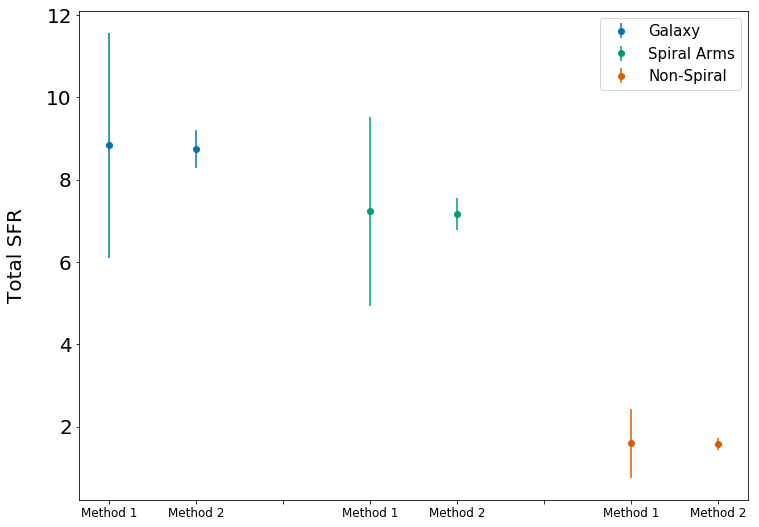

In [22]:
plt.figure(figsize=(12, 9))

plt.errorbar([1, 2], [tot_sfr_sum, tot_sfr_sum_2], yerr=[sig_tot_sfr_sum, sig_tot_sfr_sum_2], fmt='o', label='Galaxy')
plt.errorbar([4, 5], [spiral_sfr_sum, spiral_sfr_sum_2], yerr=[sig_spiral_sfr_sum, sig_spiral_sfr_sum_2], fmt='o', label='Spiral Arms')
plt.errorbar([7, 8], [nonspiral_sfr_sum, nonspiral_sfr_sum_2], yerr=[sig_nonspiral_sfr_sum, sig_nonspiral_sfr_sum_2], fmt='o', label='Non-Spiral')

plt.ylabel('Total SFR', labelpad=20, size=20)

plt.xticks(size=12)
plt.yticks(size=20)

ax = plt.gca()
ax.axes.xaxis.set_ticklabels(['Method 1', 'Method 1', 'Method 2', '', 'Method 1', 'Method 2', '', 'Method 1', 'Method 2', ''])
plt.legend(fontsize=15)

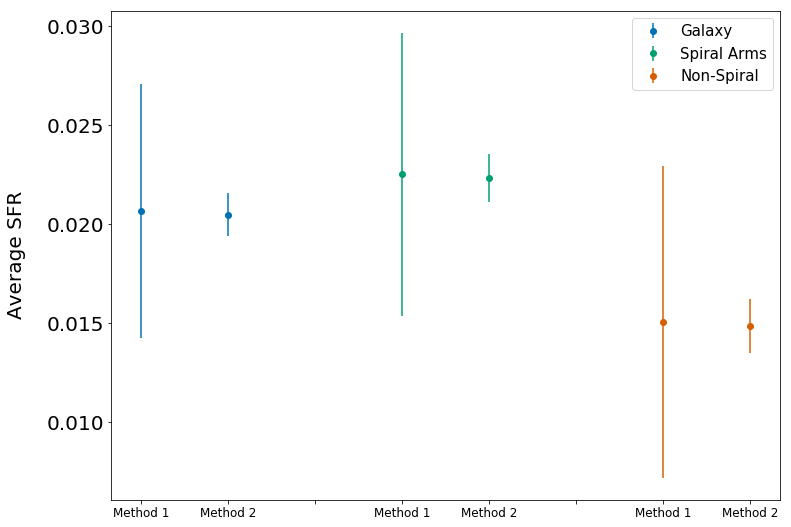

In [23]:
plt.figure(figsize=(12, 9))

plt.errorbar([0, 1], [tot_sfr_avg, tot_sfr_avg_2], yerr=[sig_tot_sfr_avg, sig_tot_sfr_avg_2], fmt='o', label='Galaxy')
plt.errorbar([3, 4], [spiral_sfr_avg, spiral_sfr_avg_2], yerr=[sig_spiral_sfr_avg, sig_spiral_sfr_avg_2], fmt='o', label='Spiral Arms')
plt.errorbar([6, 7], [nonspiral_sfr_avg, nonspiral_sfr_avg_2], yerr=[sig_nonspiral_sfr_avg, sig_nonspiral_sfr_avg_2], fmt='o', label='Non-Spiral')

plt.ylabel('Average SFR', labelpad=20, size=20)
plt.xticks(size=12)
plt.yticks(size=20)

ax = plt.gca()
ax.axes.xaxis.set_ticklabels(['Method 1', 'Method 1', 'Method 2', '', 'Method 1', 'Method 2', '', 'Method 1', 'Method 2', ''])

plt.legend(fontsize=15)

In [24]:
sig_tot_sfr_avg

0.006405630368213675

# After the analysis with one galaxy, we make a separate spiral 